In [1]:
# Reading in the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Train.csv')
df.sample(5, random_state=44)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1627,466681,Male,No,19,No,Healthcare,2.0,Low,4.0,Cat_6,D
805,462758,Male,No,18,No,Healthcare,0.0,Low,3.0,Cat_6,D
3725,467212,Female,No,28,Yes,Doctor,1.0,Low,3.0,Cat_6,B
6581,460636,Male,Yes,45,Yes,Artist,2.0,Average,3.0,Cat_3,D
7462,459157,Male,No,37,Yes,Engineer,1.0,Low,1.0,Cat_6,D


In [3]:
df = df.drop(["Segmentation", "ID"], axis="columns")
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [4]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [5]:
df = df.reset_index()
df = df.drop("index", axis="columns")
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


## Getting Dummy Variables for K-Means Clustering 

In [7]:
df_new = pd.get_dummies(df)
df_new.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,False,True,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1,38,NaN,3.0,True,False,False,True,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,67,1.0,1.0,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,67,0.0,2.0,False,True,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,40,NaN,6.0,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False


In [8]:
df_kmeans = pd.get_dummies(df, drop_first=True)
df_kmeans.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,38,NaN,3.0,False,True,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,67,1.0,1.0,False,True,True,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,67,0.0,2.0,True,True,True,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
4,40,NaN,6.0,False,True,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


## Standardization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_kmeans = scaler.fit_transform(df_kmeans)

In [11]:
print(df_kmeans.isnull().sum())

Age                           0
Work_Experience             829
Family_Size                 335
Gender_Male                   0
Ever_Married_Yes              0
Graduated_Yes                 0
Profession_Doctor             0
Profession_Engineer           0
Profession_Entertainment      0
Profession_Executive          0
Profession_Healthcare         0
Profession_Homemaker          0
Profession_Lawyer             0
Profession_Marketing          0
Spending_Score_High           0
Spending_Score_Low            0
Var_1_Cat_2                   0
Var_1_Cat_3                   0
Var_1_Cat_4                   0
Var_1_Cat_5                   0
Var_1_Cat_6                   0
Var_1_Cat_7                   0
dtype: int64


In [12]:
#df_kmeans = df_kmeans.dropna()
df_kmeans.fillna(df_kmeans.mean(), inplace=True)  # Replace NaNs with column mean

In [13]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df_kmeans)
df_kmeans.insert(df_kmeans.columns.get_loc("Age"), "Cluster", clusters)
df_kmeans.head(3)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


,Cluster,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,2,22,1.000000,4.0,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,1,38,2.641663,3.0,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,0,67,1.000000,1.0,False,True,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [14]:
df_kmeans.Cluster.unique()

array([2, 1, 0], dtype=int32)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412:

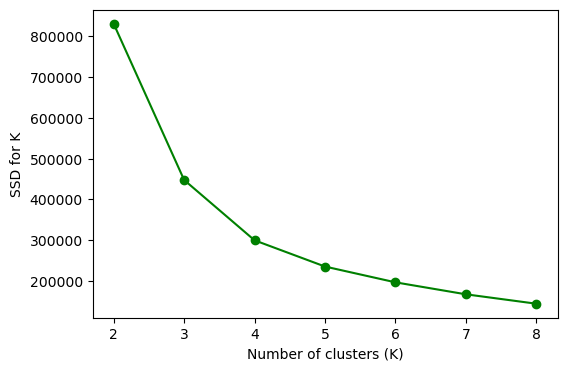

In [15]:
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_kmeans)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()